# Life expectency and GDP recalation
Based on WHO data

#### Import packages 

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [52]:
df['GDP'] = [int(i) for i in df['GDP']]

In [78]:
df = df.rename({"Life expectancy at birth (years)":"Life_exp"}, axis = "columns")

In [79]:
df.head()

,Country,Year,Life_exp,GDP
0,Chile,2000,77.3,77860932152
1,Chile,2001,77.3,70979923960
2,Chile,2002,77.8,69736811435
3,Chile,2003,77.9,75643459840
4,Chile,2004,78.0,99210392858


In [80]:
df.groupby(['Country'])['Life_exp','GDP'].agg(['median','mean']).reset_index()

Country Life_exp                       GDP              
                              median      mean          median          mean
0                     Chile    79.00  78.94375    172997500000  1.697888e+11
1                     China    74.45  74.26250   4075195000000  4.957714e+12
2                   Germany    79.85  79.65625   3396350000000  3.094776e+12
3                    Mexico    75.65  75.71875   1004375500000  9.766506e+11
4  United States of America    78.15  78.06250  14450000000000  1.407500e+13
5                  Zimbabwe    47.40  50.09375      6733671150  9.062580e+09

In [69]:
df.Country.value_counts()

Germany                     16
United States of America    16
China                       16
Mexico                      16
Zimbabwe                    16
Chile                       16
Name: Country, dtype: int64

#### Variables Distribution

Text(0.5, 1.0, 'GDP distribution')

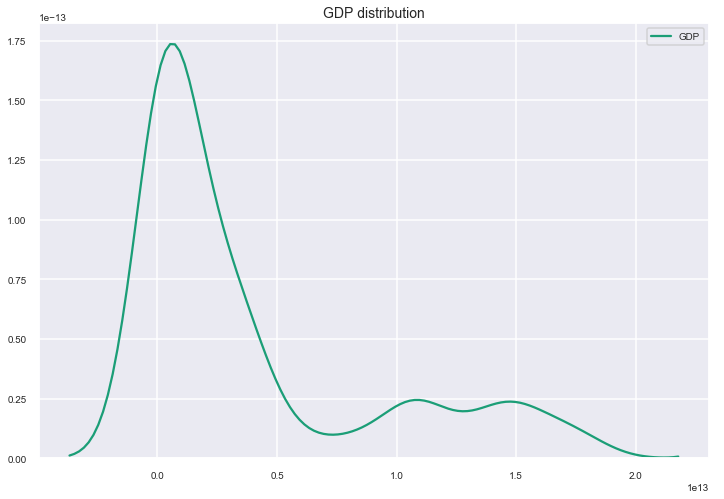

In [169]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df.GDP)
plt.title("GDP distribution", fontsize=14)

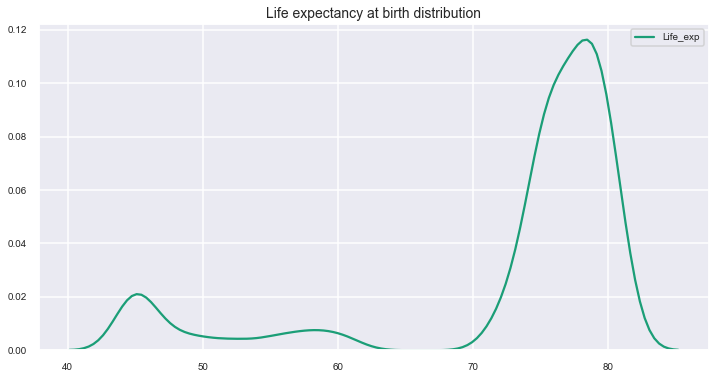

In [178]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df.Life_exp)
plt.title("Life expectancy at birth distribution", fontsize=14)
plt.show()

Text(0.5, 1.0, 'GDP Distribution by country')

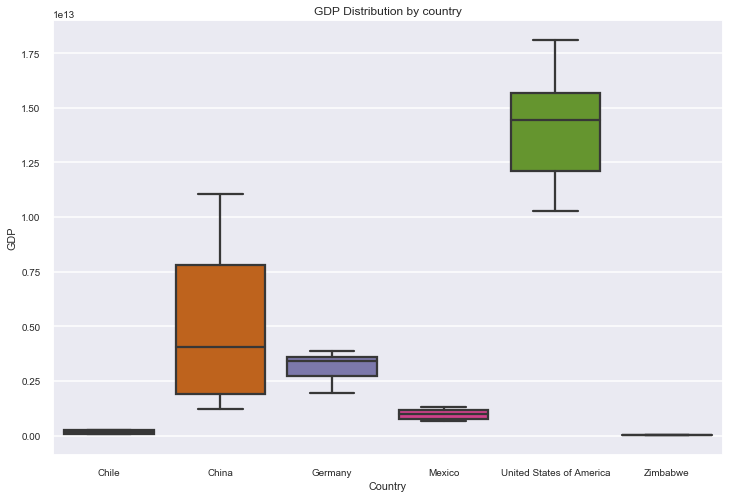

In [187]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
ax = sns.boxplot(x="Country", y="GDP", data=df)
plt.title("GDP Distribution by country", fontsize=12)

Text(0.5, 1.0, 'Life Expectancy Distribution by country')

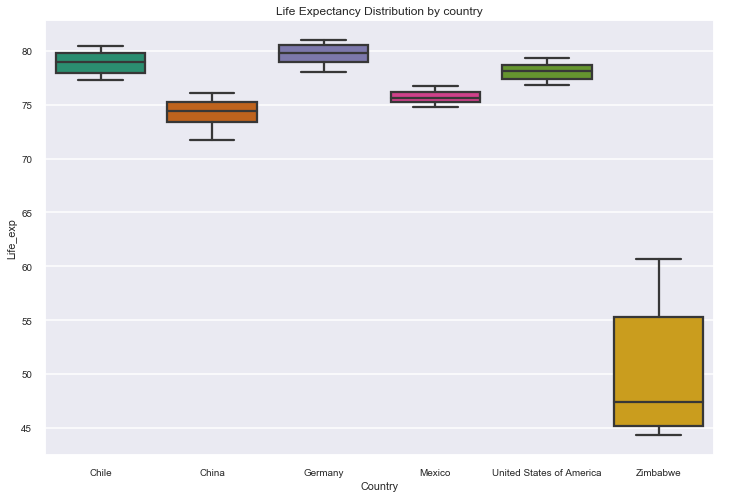

In [188]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
ax = sns.boxplot(x="Country", y="Life_exp", data=df)
plt.title("Life Expectancy Distribution by country", fontsize=12)

#### Variables Mean

In [82]:
Mean = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
Median = df.drop("Year", axis = 1).groupby("Country").median().reset_index()

Text(0.5, 1.0, 'LIfe expectancy at birth by Country')

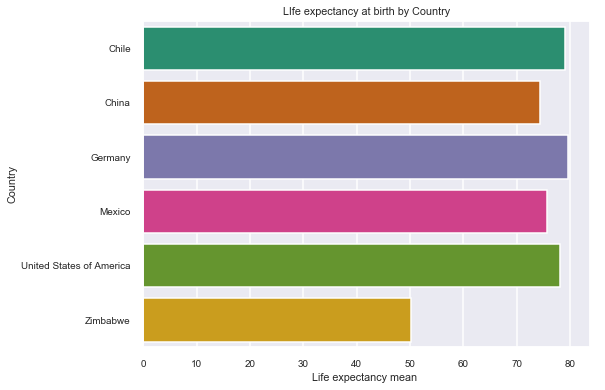

In [143]:
plt.figure(figsize=(8,6))
sns.set_palette("Dark2")
sns.barplot(x="Life_exp", y="Country", data=Mean)
plt.xlabel("Life expectancy mean ");
plt.title("LIfe expectancy at birth by Country")

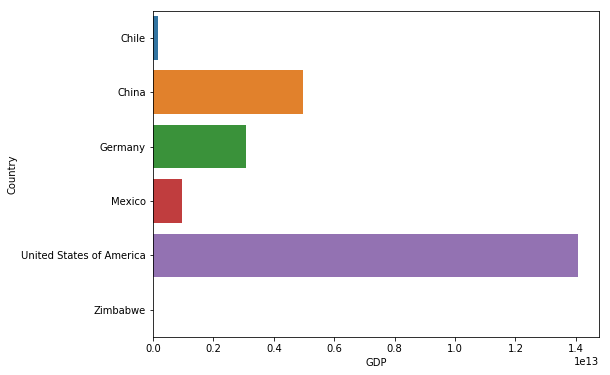

In [95]:
plt.figure(figsize=(8,6))
sns.set_palette("Dark2")
sns.barplot(x="GDP", y="Country", data=Mean)
plt.xlabel("GDP mean");
plt.title("GDP by Country")

#### Variables Trend by Year and Country

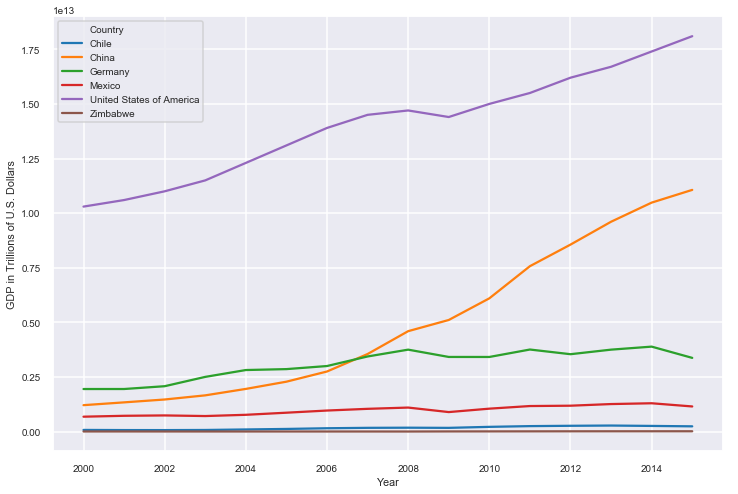

In [127]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.6)
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='upper left', ncol=1)
plt.ylabel("GDP");

Text(0.5, 1.0, 'Life Expectancy by year')

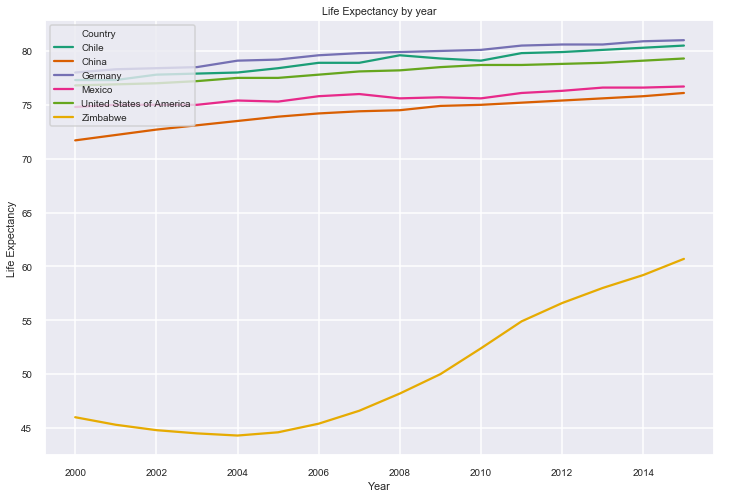

In [190]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")

sns.lineplot(x="Year", y="Life_exp", hue ='Country', data=df)
plt.legend(loc='upper left', ncol=1)
plt.ylabel("Life Expectancy");
plt.title("Life Expectancy by year")

#### Variables Change by Country II

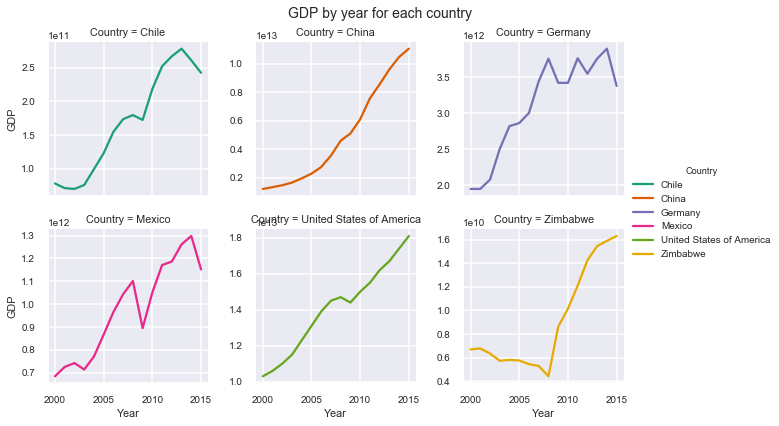

In [192]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP"))

graphGDP.fig.subplots_adjust(top=0.9)
graphGDP.fig.suptitle('GDP by year for each country', fontsize=14)
graphGDP;

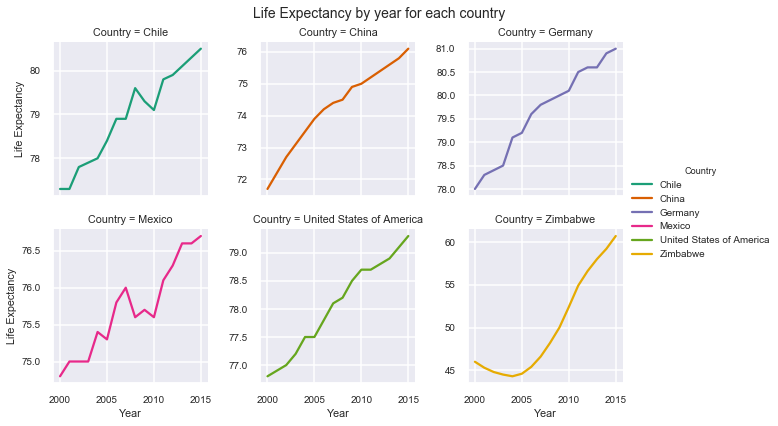

In [155]:
graphLifeExp = sns.FacetGrid(df, col="Country", col_wrap=3,hue = "Country", sharey = False)

graphLifeExp = (graphLifeExp.map(sns.lineplot,"Year","Life_exp").add_legend().set_axis_labels("Year","Life Expectancy"))

graphLifeExp.fig.subplots_adjust(top=0.9)
graphLifeExp.fig.suptitle('Life Expectancy by year for each country', fontsize=14)
graphLifeExp;

#### Correlation between GDP and Life expectancy per country

Text(0.5, 0.98, 'Life Expectancy by year for each country')

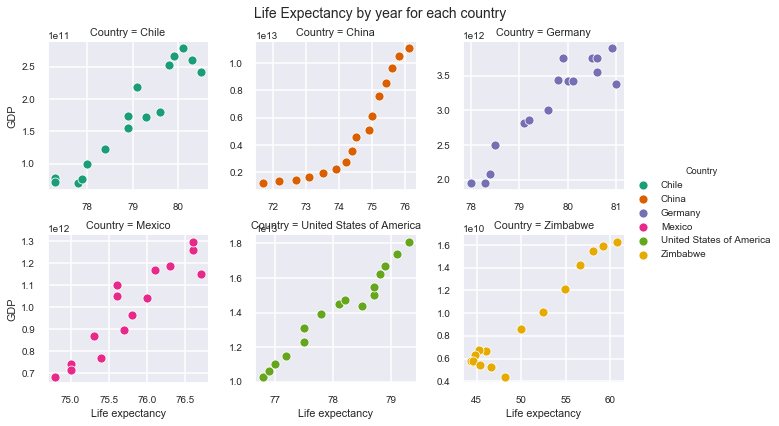

In [156]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life_exp", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy", "GDP"));

graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle('Life Expectancy by year for each country', fontsize=14)